In [2]:
%load_ext autoreload
%autoreload 2

In [50]:
import json
import os
import pandas as pd
import numpy as np
from src.visualization.plots import distribution_plot
from src.utils import summary_relative_error, statistical_summary

In [51]:
df = summary_relative_error()

In [110]:
df

,dataset,model,sampling method,performance gap,sample,threshold
0,a9a,SVC,test_score_kdn,-0.004113,0.81,0.7
1,a9a,KNeighborsClassifier,test_score_kdn,0.000514,0.81,0.7
2,a9a,RandomForestClassifier,test_score_kdn,-0.011238,0.63,0.5
3,a9a,GradientBoostingClassifier,test_score_kdn,-0.00263,0.81,0.7
4,a9a,SVC,test_score_dynamic_kdn,-0.005999,0.87,0.7
...,...,...,...,...,...,...
439,w8a,GradientBoostingClassifier,test_score_dynamic_kdn,-0.002357,0.59,0.35
440,w8a,SVC,test_score_dynamic_kdn_full,0.015619,0.27,0.35
441,w8a,KNeighborsClassifier,test_score_dynamic_kdn_full,0.060934,0.27,0.2
442,w8a,RandomForestClassifier,test_score_dynamic_kdn_full,0.023165,0.27,0.2


In [52]:
pg_df = statistical_summary(df, 'performance gap')

In [64]:
pg_df

,test_score_kdn,test_score_dynamic_kdn,test_score_dynamic_kdn_full
mean,0.00771,-0.015392,-0.003939
std,0.062173,0.057755,0.056987
min,-0.151957,-0.371072,-0.295845
5%,-0.084016,-0.106055,-0.092972
10%,-0.053847,-0.075046,-0.064461
15%,-0.035031,-0.046652,-0.041228
20%,-0.027434,-0.03517,-0.034867
25%,-0.016618,-0.027723,-0.02471
30%,-0.010218,-0.022493,-0.021161
35%,-0.004935,-0.019576,-0.016402


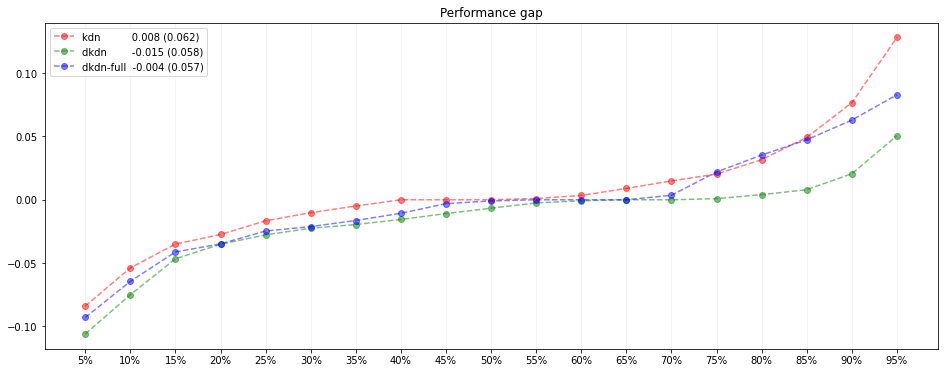

In [88]:
distribution_plot(pg_df, title='Performance gap')

In [89]:
smp_df = statistical_summary(df, 'sample')
smp_df

,test_score_kdn,test_score_dynamic_kdn,test_score_dynamic_kdn_full
mean,0.528716,0.635135,0.490405
std,0.346899,0.317122,0.317387
min,0.0,0.01,0.0
5%,0.054,0.05,0.044
10%,0.1,0.1,0.08
15%,0.12,0.18,0.0925
20%,0.14,0.284,0.204
25%,0.16,0.365,0.26
30%,0.2,0.487,0.27
35%,0.2445,0.61,0.28


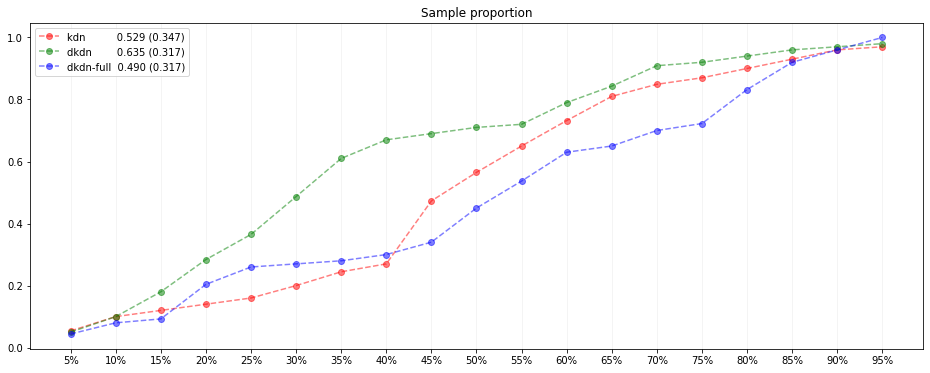

In [90]:
distribution_plot(smp_df, title='Sample proportion')

In [91]:
th_df = statistical_summary(df, 'threshold')
th_df

,test_score_kdn,test_score_dynamic_kdn,test_score_dynamic_kdn_full
mean,0.7,0.566554,0.438851
std,0.217594,0.298374,0.275892
min,0.3,0.05,0.05
5%,0.3,0.05,0.05
10%,0.3,0.135,0.1
15%,0.5,0.15,0.1
20%,0.5,0.25,0.15
25%,0.5,0.3,0.2
30%,0.52,0.4,0.25
35%,0.7,0.4,0.25


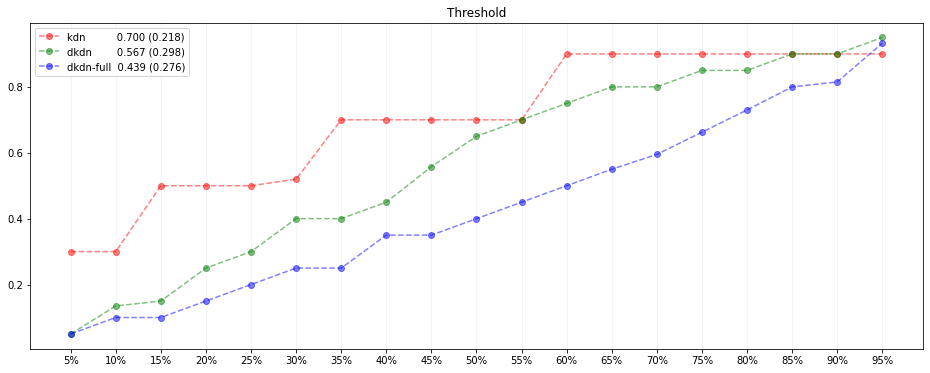

In [92]:
distribution_plot(th_df, title='Threshold')

In [ ]:
rng_cuts = [[0.05, 0.10, 0.15, 0.20, 0.25], [0.30, 0.40, 0.45], [0.50, 0.60, 0.70, 0.75], [0.80, 0.85], [0.90, 0.95]]